In [3]:
import pickle
import pandas as pd
import sentencepiece as spm
import numpy as np
from utils import *

COVERAGE = 0.98
DATA_FOLDER = FILE_PATH(PREPROCESSED)
MERGED_TXT_name = "merged_{streamer}.txt"


In [4]:
streamer = 'kimdoe'
model = 'word'
size = 1000
filename = f'sp_{streamer}_{model}_{size}_0.98.model'

a = FILE_PATH(PREPROCESSED, streamer, model, filename)
a = str(a)
sp = spm.SentencePieceProcessor()
sp.Load(a)

True

In [5]:
'''
1444993699.csv, 마작
1447862984.csv, 마작
1448780047.csv, 마작
1449697088.csv, 마작
1450736462.csv, 마작
1453664423.csv, 마작
1458716941.csv, 마작
'''
tarFile = "1444993699.csv"
df = pd.read_csv(FILE_PATH(PREPROCESSED, streamer,'csv',tarFile ))

def mkVector(string) -> np.array:
    ids = sp.EncodeAsIds(string)

    return ids
    
cnt = 0
for line in df["preprocessed"]:
    k = mkVector(line)
    if any(k):
        # print(mkVector(line), line)
        cnt += 1
    # if cnt > 100:
    #     break
print(f"{cnt} vs {len(df['preprocessed'])}")

# df["sp_1000_word"] =  df["preprocessed"].apply(lambda line : mkVector(line))

6737 vs 66260


In [6]:

aaaa= [
    "1444993699.csv",
    "1447862984.csv", 
    "1448780047.csv", 
    "1449697088.csv", 
    "1450736462.csv", 
    "1453664423.csv", 
    "1458716941.csv",
]

ppp = "target.txt"

savee = []

for aaa in aaaa:
    k = FILE_PATH(PREPROCESSED, streamer,'csv', aaa)
    for ll in pd.read_csv(k)["preprocessed"].to_list():
        savee.append(ll.strip('""'))

with open(ppp , mode='w', encoding='utf-8') as fp:
    fp.writelines('\n'.join(savee)) 

In [7]:
tarFile = "1444993699.csv"
df = pd.read_csv(FILE_PATH(PREPROCESSED, streamer,'csv',tarFile ))

cnt = 0
cnt2 = 0
Size= 4000
for model in ['unigram', 'word', 'bpe', 'char']:
    cnt = 0
    cnt2= 0
    print(model.center(20, '~'))
    # sp_kimdoe_char_1000_0.98.vocab

    a = FILE_PATH(PREPROCESSED, streamer, model, f"sp_{streamer}_{model}_{Size}_0.98.model")
    # sp.Load(f'target_{model}.model')
    sp.Load(str(a))
    for line in df["preprocessed"]:
        k = sp.EncodeAsIds(line.strip('"'))
        # print(k, line.strip('"'), sp.DecodeIds(k), line.strip('"')==sp.DecodeIds(k).strip())
        if line.strip('"')==sp.DecodeIds(k).strip():
            cnt2 +=1
        if all(k):
            # print(mkVector(line), line)
            cnt += 1
        # if cnt > 100:
        #     break
    print(f"{cnt} vs {len(df['preprocessed'])} | {cnt / len(df['preprocessed'])*100:.2f}%")
    print(f"{cnt2} vs {len(df['preprocessed'])} | {cnt2 / len(df['preprocessed'])*100:.2f}%")

~~~~~~unigram~~~~~~~
60028 vs 66260 | 90.59%
41948 vs 66260 | 63.31%
~~~~~~~~word~~~~~~~~
33084 vs 66260 | 49.93%
19726 vs 66260 | 29.77%
~~~~~~~~bpe~~~~~~~~~
60028 vs 66260 | 90.59%
41948 vs 66260 | 63.31%
~~~~~~~~char~~~~~~~~
60028 vs 66260 | 90.59%
41948 vs 66260 | 63.31%


In [ ]:
tarFile = "1444993699.csv"

modelFile = FILE_PATH(PREPROCESSED, streamer,'unigram','sp_kimdoe_unigram_4000_0.98.model' )

sp.Load(f'{modelFile}')

sentences = list(pd.read_csv(FILE_PATH(PREPROCESSED, streamer,'csv',tarFile ))["preprocessed"])

ii = [ x for x in map(lambda x : sp.EncodeAsIds(x.strip('"')), sentences)]


In [19]:

ii

[[3, 2036, 3, 2036],
 [105, 122, 808, 431],
 [371],
 [1779, 0, 754, 3958],
 [3906],
 [91],
 [245, 11],
 [940, 1193, 219],
 [371],
 [23, 100, 227, 455, 511, 39, 1252, 15],
 [3, 0, 1063, 1063, 0, 41, 10, 41],
 [42],
 [185, 185],
 [972, 267, 41, 58, 1208, 2756, 2245, 16, 208, 0, 126],
 [371],
 [3, 0, 127],
 [47, 141],
 [371],
 [333, 333],
 [223],
 [156, 156],
 [2576, 769, 3, 1705, 2543],
 [371],
 [1197, 1305, 749, 75],
 [2821, 828, 2411, 537, 336, 6, 1514],
 [371],
 [156, 156],
 [47, 1892, 141],
 [3952],
 [371],
 [333, 333],
 [156, 156],
 [3, 0],
 [371],
 [482, 7, 1004, 10, 1295, 28],
 [371],
 [185, 185],
 [482, 1052, 5],
 [3544, 3949],
 [77, 916, 1331, 504, 927, 38, 2914],
 [371, 11, 0, 212],
 [2886, 62],
 [582],
 [875, 739, 210],
 [3243, 3243],
 [482, 3544, 3949],
 [371],
 [3952, 0],
 [368],
 [1779, 0, 754, 1197, 1305, 749, 75],
 [166, 185],
 [88, 45, 88],
 [940, 1063, 482, 483, 389, 899, 17, 839, 1148, 17, 3, 0, 9],
 [371, 1061],
 [448, 3127],
 [368],
 [47, 106, 922, 182],
 [3138, 3, 7

In [ ]:
model = 'unigram'
vocabSize = 1000

# vv = list()
# for ee in ii:   
#     t = np.zeros(vocabSize)
#     for index in ee:
#         t[index] += 1.0
#     vv.append(t)
# vvv = np.array(vv)

# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
model = PCA(n_components=50)
model.fit(ii)

[0.17734895 0.05254931 0.02295399 0.01777413 0.01442769 0.01198956
 0.0112511  0.01067935 0.00971245 0.00772075 0.0069408  0.00679075
 0.00663949 0.00647055 0.00622635 0.00584913 0.00575704 0.00566072
 0.00541338 0.00514305 0.0049693  0.0047743  0.00471263 0.00464358
 0.00442538 0.00438491 0.00420805 0.00412606 0.00404654 0.0040163
 0.0039984  0.00384489 0.00374997 0.0036959  0.00366302 0.00358712
 0.00353539 0.0034915  0.00340119 0.00337081 0.00332714 0.00331824
 0.00323531 0.00321533 0.00314987 0.00314516 0.00311579 0.00307448
 0.00305747 0.00303472]


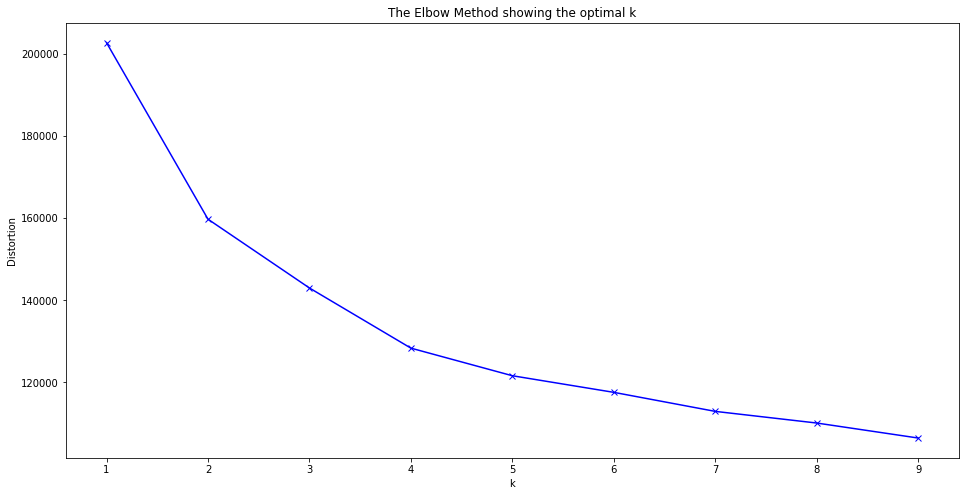

In [9]:
print(model.explained_variance_ratio_)
data = model.fit_transform(vvv)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [12]:
label  =KMeans(5).fit_predict(data)
import collections
collections.Counter(label)
# for i in range(8):
#     print(label)

Counter({4: 11271, 3: 21787, 0: 22189, 1: 551, 2: 10462})

In [13]:
df = pd.read_csv(FILE_PATH(PREPROCESSED, streamer,'csv',tarFile ))

df['cluster'] = label
df

,real time,uptime,upsecond,nickname,chat,preprocessed,morphs_Mecab,morphs_Mecab_noun,morphs_Okt,morphs_Okt_noun,cluster
0,2022-04-03 16:46:54,0:00:02,2,일본외노자가된오타쿠,"""왔어 왔어""","""왔어 왔어""","['왔', '어', '왔', '어']",[],"['왔어', '왔어']",[],4
1,2022-04-03 16:46:57,0:00:05,5,쪼꼬맹이_,"""마신강림""","""마신강림""","['마신', '강림']",['강림'],"['마신', '강림']",['강림'],3
2,2022-04-03 16:47:01,0:00:09,9,레이드데이,"""도하""","""도하""",['도하'],['도하'],['도하'],['도하'],3
3,2022-04-03 16:47:01,0:00:09,9,도바아,"""케헤헿 도형 기다렸다구""","""케헤헿 도형 기다렸다구""","['케', '헤', '헿', '도형', '기다렸', '다구']",['도형'],"['케헤헿', '도형', '기다렸다구']","['케헤헿', '도형']",4
4,2022-04-03 16:47:21,0:00:29,29,김치즈감자탕,"""하와와""","""하와와""","['하와', '와']",['하와'],"['하와', '와']",['하와'],3
...,...,...,...,...,...,...,...,...,...,...,...
66255,2022-04-04 01:47:50,9:00:59,32459,겜못펄슨,"""똘 똘 이 동""","""똘 이 동""","['똘', '이', '동']","['똘', '이', '동']","['똘', '이', '동']","['똘', '이']",4
66256,2022-04-04 01:47:51,9:00:59,32459,브루클린엔초장,"""도바 커바 트바 다들 잘자요 kimdoeDB kimdoeDB""","""도바 커바 트바 다들 잘자요 kimdoeDB kimdoeDB""","['도바', '커', '바', '트', '바', '다', '들', '잘', '자요'...","['도바', '커', '바', '자요']","['도바', '커', '바', '트바', '다', '들', '잘', '자요', 'k...","['도바', '바', '트바']",1
66257,2022-04-04 01:47:52,9:01:00,32460,_뉴런,"""똘 삼 이 동""","""똘 삼 이 동""","['똘', '삼', '이', '동']","['똘', '삼', '이', '동']","['똘', '삼', '이', '동']","['똘', '삼', '이']",4
66258,2022-04-04 01:47:52,9:01:00,32460,로리오스,"""똘 똘 똘 이 동""","""똘 이 동""","['똘', '이', '동']","['똘', '이', '동']","['똘', '이', '동']","['똘', '이']",4


In [31]:
# for i in range(8):
i=0
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

킹도
헤응ㅇ
아 43초 손해봤네
꼐헤헤헼 김도다 김도
저기선 김도인딩하던데 여긴 오프닝이네
엥??
믿고있었다구
도 ㅡ 하
케헤헤
헐
축하드립니다
거짓말이야
가능
금탁 축하드립니다
케헤헤헿
브금 어디갔어
크헤헷
오늘 빠르다
응애
ㄷㅎ
ㄷ하
kimdoeWA2 kimdoeNYA
업타임
뭐여 왜이리 푸짐해
케헤헷
케헤헤헷 도형
밥이 뭐 그렇게생겼어요
도형 믿고있었다구 ㅋㅋ
금탁 ㅊㅊ
ㄱㅊㅈ
비빔밥
깐풍기
양장피
형 kimdoeLOL
킹 하
김 도 김도
양장피 ㄷㄷ
양장피구나 ㅋㅋ
밥먹관찰
혀어엉?
케헤헷 마테이타조
kimdoeLOLG
나도 중식먹고싶다
kimdoeLOLG
금택기
금탁기 멋져요
형 오늘도 그거 할꺼지?
금도님 오셨네
ㅁㅈ?
택기잇
비싼거먹네? 금탁가서 그런가?
로쿠만
금도
금도오
kimdoeLOLG kimdoeNYA
kimdoeDJ kimdoeBC2
팔보채?
금탁의 지배자야 형?
김도가 왔어어
골택기
금탁 양장피
김택기 금탁기
ㅋㅋ 왜이리 피곤해보임
금 탁 ㅋㅋ
kimdoeLOLG
ㄷㅎ
금도
금 탁 ㅋㅋ
금 도
크
금탁기님 멋져요
금 도
헐 금탁 ㅋㅋ
이마에
금 탁
금 탁
zz
금택기
믄탁
이형 금탁임?
금택기
금색
금딱기
형 금탁 인정패도 하나 사 ㅋㅋ
김 탁
나 캠핑와서 도형 보고있네
켛헿헤헤헿
금탁 인정패
kimdoeAA
어쩐지 빛이 나더라니
금탁 양장피
번쩍번척
금택기
이마 금탁
금탁기념 양장피 ㅋㅋ
뿌듯
케헤헷
금탁기념 양장피
금 탁
양장피ㅜㅜ
이마에 금탁ㅋㅋ
실버쓰레기들아
금택기 ㄷㄷ
금택기님
형 이마에
금 탁
금 탁
금 탁
금 탁
금 탁
이마이 금탁
금 탁
금택기 ㅋㅋ
금탁이라 그런지 머리가 빛나는거같아
금택기님 ㄷㄷ
금탁 헤일로
금탁기님 식사 하신답니다 정중
샐러드같네
당근
피망
금 탁
ㅈ망
새우야
버섯?
내가 싫어하는거만 들어있네
비쥬얼이
트수
첫끼같은데 저거
쓰까먹어
ㅁㄹㅇㅈ
비쥬얼이 개밥
마 스까무라
새우야 저리꺼져야
고기가 없어
스까서먹으면됩니다
쓰까무
개밥같은데 비쥬얼
스까무라
쓰까드세요
양장피 ㄷㄷ
혐근
배달인가요?
잡채인줄
소

In [ ]:
i=1
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

In [ ]:
i=2
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

In [ ]:
i=3
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

In [ ]:
i=4
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

In [ ]:
i=5
for u , x in enumerate(df[df['cluster'] == i]['preprocessed']):
    print(x.strip('"'))
    # if u >300:
print("========================")
print("========================")

In [30]:
import pickle
oktDict = FILE_PATH('preprocessed', 'kimdoe', 'dict_okt.pickle')
mecabDict = FILE_PATH('preprocessed', 'kimdoe', 'dict_mecab.pickle')
with open(oktDict, mode='rb') as fp:
    a = pickle.load(fp)
    t = sorted(a.items(), key = lambda x:x[1], reverse=True)
    
    for k, v in t:
        if v < 100:
            break
        print(k, v)

ㅋㅋ 671561
? 391237
이 208134
도 103984
가 95768
ㄷㄷ 80944
ㄹㅇㅋㅋ 67218
?? 63921
아 60899
에 57537
야 53640
은 52394
는 51345
다 48794
김 47846
오 46750
형 45552
ㄹㅇ 44351
을 42051
네 40801
의 39665
와 39025
안 38356
2 34512
거 33658
1 30779
개 29673
왜 29450
진짜 29180
나 28674
게 28390
로 28088
뭐 27834
들 27068
ㅔ 26405
만 26091
를 25763
그 25619
못 25445
냐 24596
요 23698
이야 23221
3 22993
ㅠㅠ 22902
론 22458
지 22257
ㅗㅜㅑ 21746
한 21075
해 20825
어 20757
잘 20718
고 20068
앗 19775
저 19757
게임 19064
커비 18069
더 17961
겜 17766
마작 17561
이다 17093
너무 17073
걸 16948
으로 16750
4 16141
kimdoeGG 15902
자 14991
5 14758
님 14662
김도 14368
또 14017
서 13625
리치 13622
중 13257
아니 13255
라 13251
임 13112
이네 13080
대 12830
면 12771
kimdoeLTK 12729
내 12588
인데 12578
하 12324
인가 12202
좀 12185
ㅏㅏ 11983
그냥 11618
kimdoeRON 11536
같이 11481
에서 11449
사람 11367
kimdoeBEAT 11194
너 11159
말 11071
패 10963
기 10812
kimdoeNYA 10799
갓 10698
봐 10596
ㅖ 10400
킹 10347
머리 10288
데 10255
냥 10223
캬 10106
각 9928
인 9735
근데 9732
통 9716
간다 9707
동 9695
이제 9639
날 9632
자동 9511
오늘 9324
일부러 9236
지금